In [1]:
from qupulse.pulses import *
from qupulse.pulses.plotting import plot
import numpy as np
import sympy as sp

gauss = FunctionPT('ampl * exp(-((t - t_gauss/2) / tau)**2)', 't_gauss', 'C')

gauss_iq = AtomicMultiChannelPT(
    gauss.with_mapping(channel_mapping={'C': 'I'}) * 'cos(omega * t + phi)',
    gauss.with_mapping(channel_mapping={'C': 'Q'}) * 'sin(omega * t + phi)',
)


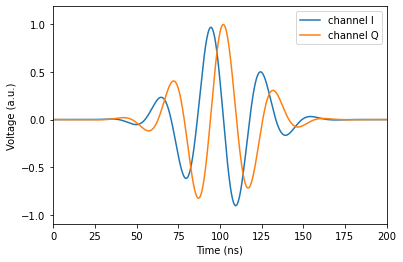

In [2]:
parameters = {
    'ampl': 1.,
    'tau': 30.,
    't_gauss': 200,
    'omega': .2,
    'phi': 0.
}

_ = plot(gauss_iq, parameters=parameters, stepped=False)

Often one wants a single channel

Area theorem:

$$H(t) = cos(\omega t + \phi) E(t) \sigma_x$$
$$A(t) = \alpha \int_{0}^{t}{\text{d}t'E(t')}$$
$$\Psi (A) = \sqrt{1 - P(A)} g + e^{-i \phi}\sqrt{P(A)} e$$
$$P(A) = \sin^2 (A / 2)$$


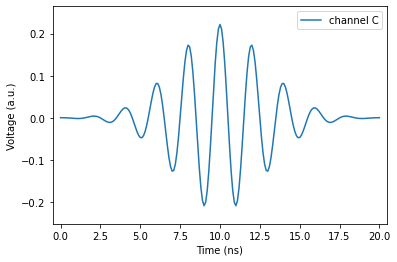

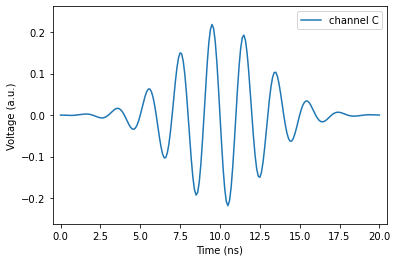

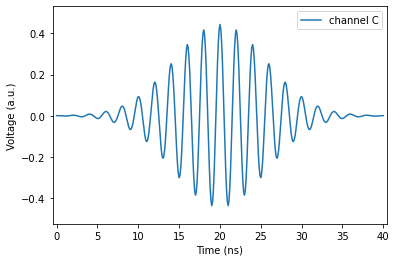

In [3]:
omega, n_rot = sp.symbols('omega n_rot')

t_period = sp.pi * 2 / omega
t_gauss = n_rot * t_period

gauss_n = gauss.with_mapping({'t_gauss': t_gauss, 'tau': t_gauss / 5})

gauss_mod = gauss_n * 'cos(omega * t + phi)'


# integer number of rotations
# pi half  -> P = 0.5 -> A = asin(sqrt(1/2)) * 2



experiment_parameters = {
    'alpha': 1.,
    'omega': 0.5 * 2 * np.pi,
}

pulse_settings = {'n_rot_pi_half': 10, 'n_rot_pi': 20}

ampl_pi_half = sp.asin(sp.sqrt(1/2)) * 2 * sp.symbols('alpha') / gauss_n.integral['C'] * sp.symbols('ampl')
ampl_pi = sp.asin(sp.sqrt(1)) * 2 * sp.symbols('alpha') / gauss_n.integral['C'] * sp.symbols('ampl')

pi_half = gauss_mod.with_mapping({'ampl': ampl_pi_half.subs({'n_rot': 'n_rot_pi_half'}), 'n_rot': 'n_rot_pi_half'})
pi_pls = gauss_mod.with_mapping({'ampl': ampl_pi.subs({'n_rot': 'n_rot_pi_half'}), 'n_rot': 'n_rot_pi'})

x_pi_half = pi_half.with_mapping({'phi': 't_global * omega'})
y_pi_half = pi_half.with_mapping({'phi': 't_global * omega + pi / 2'})
x_pi = pi_pls.with_mapping({'phi': 't_global * omega'})

_ = plot(x_pi_half, parameters={**experiment_parameters, **pulse_settings, 't_global': 0}, stepped=False)
_ = plot(y_pi_half, parameters={**experiment_parameters, **pulse_settings, 't_global': 0}, stepped=False)
_ = plot(x_pi, parameters={**experiment_parameters, **pulse_settings, 't_global': 0}, stepped=False)

In [4]:
wait = ConstantPT('t_wait', {'C': 0})

cpmg = x_pi_half.with_mapping({'t_global': 0}) @ (wait @ x_pi.with_mapping({'t_global': 'i_cpmg * t_wait'})).with_iteration('i_cpmg', 'n_cpmg')

In [5]:
ampl.subs({'n_rot': 'n_rot_pi_half'})

NameError: name 'ampl' is not defined

In [ ]:
ampl